In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

#### 코랩 사용시

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import os
os.chdir('/Users/justdoit/Desktop/DSL/2022-1/220203 Supervised Learning')

코랩 사용시 본인 구글 드라이브 경로는  
/content/drive/MyDrive/...  
입니다.

In [4]:
os.getcwd()

'/Users/justdoit/Desktop/DSL/2022-1/220203 Supervised Learning'

## 아파트 전월세 가격 회귀 모델

2020년 전국의 아파트 전월세 거래 데이터셋을 활용합니다.  
해당 데이터셋에서 전세 거래와 월세 거래를 구분한 후,  
보증금 혹은 월세에 가장 큰 영향을 미치는 feature를 찾아  
선형회귀 모델을 세우려고 합니다.

1) Apartment_train.csv, Apartment_test.csv 파일을  
apart_train, apart_test 라는 변수에 DataFrame 형태로 불러와주세요.

In [5]:
apart_train = pd.read_csv('Apartment_train.csv')
apart_test = pd.read_csv('Apartment_test.csv')

2) apart 데이터셋에서 월세와 전세를 구분하여  
다음과 같은 4개의 변수에 할당하려고 합니다.  

- train set에서 월세_train, 전세_train  
 test set에서 월세_test, 전세_test  

이에 해당하는 코드를 작성해주세요.


In [6]:
apart_train

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
2,대구광역시,동대구반도유보라,월세,39.7596,1000,54,11,2018
3,대전광역시,주공1단지아파트,월세,26.3700,579,8,4,1993
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014
...,...,...,...,...,...,...,...,...
13995,부산광역시,해운대비치베르빌,전세,123.7550,28000,0,33,2005
13996,대구광역시,센트로팰리스,월세,80.7360,2000,130,7,2007
13997,전라북도,동신,전세,76.3500,6000,0,9,1991
13998,서울특별시,이스턴잠실,전세,29.5700,31000,0,4,2020


In [7]:
apart_test

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,경기도,한빛마을6단지(휴먼시아)(1023),월세,45.8400,2806,19,15,2011
1,경기도,중앙하이츠1,전세,84.7900,31500,0,10,1993
2,대구광역시,달성화성파크드림,전세,59.9687,8000,0,9,2011
3,광주광역시,휴먼시아2,월세,46.5300,4526,7,4,2008
4,부산광역시,태진팰리스,전세,52.0100,18000,0,5,2018
...,...,...,...,...,...,...,...,...
2995,세종특별자치시,첫마을7단지(래미안),전세,101.4500,30000,0,22,2012
2996,광주광역시,e편한세상,전세,113.7384,37000,0,15,2010
2997,대전광역시,은어송마을3단지(가오아이파크),전세,84.9326,25000,0,10,2006
2998,강원도,원주기업도시유보라아이비파크1단지(1-2블록),전세,59.9833,10000,0,10,2019


In [8]:
월세_train = apart_train[apart_train['전월세구분']=='월세']
전세_train = apart_train[apart_train['전월세구분']=='전세']

월세_test = apart_test[apart_test['전월세구분']=='월세']
전세_test = apart_test[apart_test['전월세구분']=='전세']

3) 이후 작업부터는 따로 언급이 없을 경우  
위에서 생성한 4개의 DataFrame 중  
train set만 이용하여 작업을 수행합니다.  

'월세'의 경우 월세 가격에,  
'전세'의 경우 보증금 가격에 
영향을 가장 많이 미치는 feature를 찾고자 합니다.  

다양한 방법을 동원해서,  
해당하는 feature를 '1개만' 찾아주세요.  

아마도 '월세'와 '전세' 두 경우에서 모두 같은 feature가 나올 것입니다.  

(hint: 상관계수행렬이나 산점도 이용)

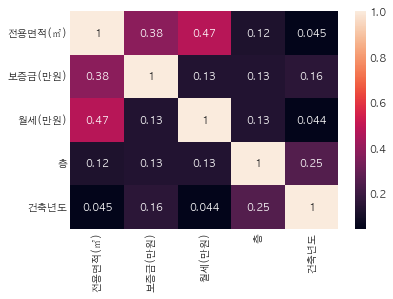

In [14]:
plt.rcParams['font.family'] = 'AppleGothic'
sns.heatmap(월세_train.corr(),annot=True)
plt.show()

#

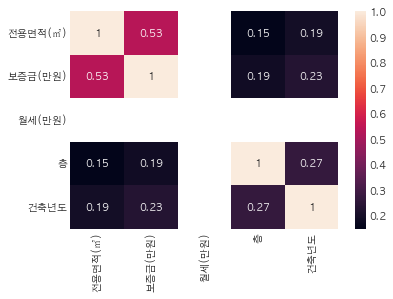

In [15]:
plt.rcParams['font.family'] = 'AppleGothic'
sns.heatmap(전세_train.corr(),annot=True)
plt.show()

#

4) 위에서 찾은 feature를 이용해(이하 X라 칭함)  
'월세'의 경우 월세 가격(이하 y1),  
'전세'의 경우 보증금 가격(이하 y2)  
을 예측하는 모델을 세울 것입니다.

첫번째, 월세 가격을 예측하는 모델을 구축합니다.  
**파이프라인을 사용하지 않고** 작업합니다.  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
 StandardScaler를 사용합니다.(변수명은 scaler)  
- X와 y1의 관계를 나타내는 선형회귀 모델을 구축합니다.  
LinearRegression Estimator(변수명은 lin_reg_1)를 사용합니다.

In [17]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [20]:
# input 데이터는 X_train, target 데이터는 y1_train 변수에 할당
X_train = 월세_train.iloc[:,3]
y1_train = 월세_train.iloc[:,-3]

In [26]:
type(X_train)

pandas.core.series.Series

In [27]:
# 데이터 scaling 하기
# X 데이터만 scailing 하며,
# 기존 X_train 변수에 덮어씌웁니다.

scaler = StandardScaler()
X_train = X_train[:,np.newaxis]

X_train = scaler.fit_transform(X_train)

/var/folders/_0/yhfzsvrs2h5gv6whjmhg6fn40000gn/T/ipykernel_1825/4213597530.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]


In [30]:
# 선형회귀 모델 생성 후 fitting 시킵니다.
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train, y1_train)

LinearRegression()

/Users/justdoit/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justdoit/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


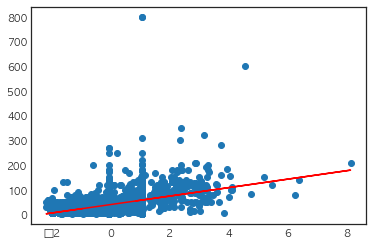

In [31]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train)
plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r');

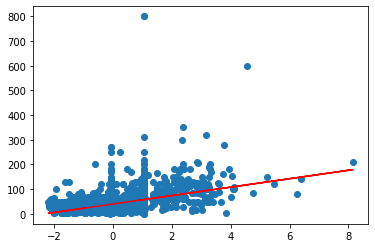

테스트셋, 즉 '월세_test'와  
이미 fitting된 모델을 이용해 predict를 수행합니다.  
y1_hat 이라는 변수에 '월세_test'를 predict한 값을 할당합니다.

In [34]:
월세_test

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,경기도,한빛마을6단지(휴먼시아)(1023),월세,45.8400,2806,19,15,2011
3,광주광역시,휴먼시아2,월세,46.5300,4526,7,4,2008
5,강원도,원주흥업엘에이치천년나무2,월세,46.7200,4051,12,4,2016
8,전라북도,감나무골대우대창,월세,84.5900,2000,50,3,1999
9,강원도,푸른숨엘에이치3단지,월세,74.9500,9870,19,16,2015
...,...,...,...,...,...,...,...,...
2984,충청북도,우미린스테이,월세,70.5634,10240,12,4,2018
2985,대구광역시,삼덕청아람,월세,59.9890,2000,90,12,2013
2991,경상남도,성원1차,월세,79.8100,1000,60,6,1991
2992,전라북도,푸른솔,월세,49.9500,1500,25,9,1993


In [35]:
# input 데이터는 X_test, target 데이터는 y1_test 변수에 할당
X_test = 월세_test.iloc[:,3]
y1_test = 월세_test.iloc[:,-3]

In [37]:
# X_test 역시 정규화 해주어야 합니다. 주의할점?
X_test = X_test[:,np.newaxis]
X_test = scaler.transform(X_test)

/var/folders/_0/yhfzsvrs2h5gv6whjmhg6fn40000gn/T/ipykernel_1825/406512616.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [38]:
# y1_hat에 predict값 할당
# 시각화. 체크용입니다.
y1_hat = lin_reg_1.predict(X_test)

/Users/justdoit/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/justdoit/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


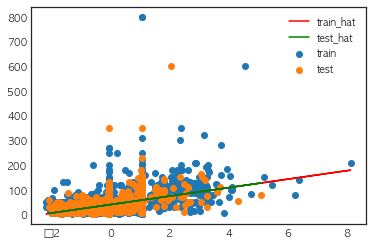

In [40]:
# 시각화. 체크용입니다.
plt.scatter(X_train[:, 0], y1_train, label='train')
plt.scatter(X_test[:, 0], y1_test, label='test')

plt.plot(X_train[:, 0], 
         lin_reg_1.predict(X_train), 
         c='r', label='train_hat')
plt.plot(X_test[:, 0], 
         y1_hat, 
         c='g', label='test_hat')

plt.legend();

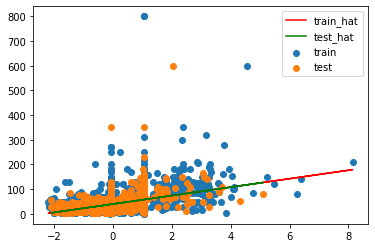

두번째, 전세 보증금 가격(y2) 예측 모델을 구축합니다.  
**파이프라인을 사용하여** 만듭니다. 
파이프라인 이름은 p1으로 정하고,  
수행해야할 작업은 다음과 같습니다.  
- 데이터를 scaling 합니다.  
StandardScaler를 사용합니다.(변수명은 scaler)  

- 다항 특성을 만들 것입니다.  
PolynomialFeatrues 변환기를 사용하며,  
차수는 자유이고 bias는 없습니다.(변수명은 poly)  

- X와 y2의 관계를 나타내는 Ridge 모델을 구축합니다.  
Ridge Estimator를 사용하며, hyperparameter는 자유롭게 설정합니다.  
(변수명은 rdg_reg_1)

In [44]:
# 관련 모듈 import
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

In [ ]:
('poly_feature', PolynomialFeatures(degree=2, include_bias=False)),
                     ('scaler', StandardScaler()),
                     ('model', LinearRegression())

In [55]:
# 파이프라인 생성
p1 = Pipeline([
    ('poly',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler',StandardScaler()),
    ('rdg_reg_1',Ridge(alpha=0.1))
               
])

In [56]:
전세_train

,시군구,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도
0,대구광역시,트윈팰리스,전세,84.1500,32000,0,13,2006
1,부산광역시,삼익비치,전세,73.9200,12000,0,8,1979
4,광주광역시,선운지구진아리채,전세,78.0887,27000,0,1,2014
8,대전광역시,엑스포,전세,116.3700,28000,0,15,1994
9,충청남도,신세계,전세,83.5650,2200,0,5,1993
...,...,...,...,...,...,...,...,...
13994,충청남도,신동아파밀리에,전세,109.2220,18000,0,15,2005
13995,부산광역시,해운대비치베르빌,전세,123.7550,28000,0,33,2005
13997,전라북도,동신,전세,76.3500,6000,0,9,1991
13998,서울특별시,이스턴잠실,전세,29.5700,31000,0,4,2020


In [57]:
# input 데이터는 X_train, target 데이터는 y2_train 변수에 할당
X_train = 전세_train.iloc[:,3]
y2_train = 전세_train.iloc[:,-4]

In [58]:
# 파이프라인 fitting
X_train = X_train[:,np.newaxis]

p1.fit(X_train, y2_train)

/var/folders/_0/yhfzsvrs2h5gv6whjmhg6fn40000gn/T/ipykernel_1825/2292679997.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('rdg_reg_1', Ridge(alpha=0.1))])

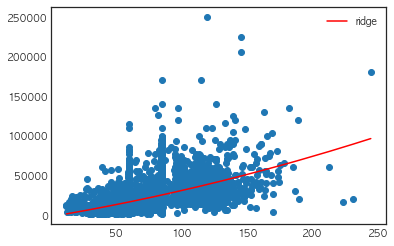

In [59]:
# 시각화. 체크용입니다.
# degree=5, alpha=0.5 적용하였을 경우
plt.scatter(X_train[:, 0], y2_train)
plt.plot(np.sort(X_train[:, 0]), 
         np.sort(p1.predict(X_train)), 
         c='r', label='ridge')
plt.legend();

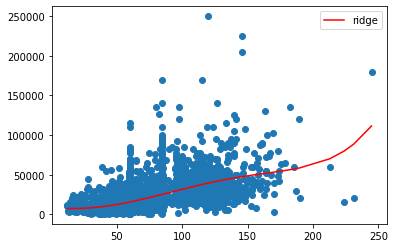

수고하셨습니다.